# Comparing Bot Intelligence Levels

### Dans ce notebook, le score correspond au nombre de coups demandés pour gagner une partie.

In [6]:
import sys
from pathlib import Path

ROOT_DIR = Path().resolve().parent
VERSION2_DIR = ROOT_DIR / "version_2"

sys.path.append(str(VERSION2_DIR))

In [7]:
from exceptions import BotLoopError
from players import Player, Bot
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
def bot_play (diff):
    """
    Starts Battleship game
    """
    # Initialising
    player_name = "John Doe"
    bot_name = "tester"
    P = Player (player_name)
    B = Bot (bot_name,diff)
    # Scoreboard Init and upadte
    
    boat_names = {
        "P": ("Porte-Avion", 5),
        "C": ("Croiseur", 4),
        "S": ("Sous-marin", 3),
        "T": ("Torpilleur", 2),
        "B": ("Barque", 1)
    }

    # Placing player bots
    P.boat_coords.clear()

    P.boat_coords = B.place_boats()

    bot_won = False
    boat_hit = ""
    bot_score = 0
    bot_tries = 0

    while not bot_won :

        boat_hit, sunk = B.attack(grid= P.grid, boat_coord= P.boat_coords)
        bot_tries += 1
        if sunk :
            bot_message = f"{bot_name} sunk {boat_names[boat_hit][0]}"
            B.boats_left -= 1
            if B.boats_left == 0 :
                bot_won = True
        elif (boat_hit != "Miss") & (boat_hit != "Fail") :
            bot_message = f"{bot_name} hit {boat_names[boat_hit][0]}"
        elif boat_hit == "Miss" :
            bot_message = f'{bot_name} missed !'
        elif (boat_hit == "Fail") :
            bot_message = f"{bot_name} entered invalid coordinates"

        if bot_tries >= 100 :
            raise BotLoopError ("Bot exceeded 100 failed attempts")
        
        bot_score += 1
        if boat_hit != "Fail" :
            bot_tries = 0

    return bot_score, P.boat_coords

#### Simulate N runs

In [9]:
N = 2000
scores_easy = []
scores_hard = []
boat_placements = np.zeros([10,10])
for i in range (N) :
    result, coords = bot_play(0)
    scores_easy.append(result)
    for name in coords :
        for (x,y) in coords[name] :
            boat_placements[x][y]+=1
for i in range (N) :
    result, coords = bot_play(1)
    scores_hard.append(result)
    for name in coords :
        for (x,y) in coords[name] :
            boat_placements[x][y]+=1

In [10]:
print("================= EASY ================")
print("Mean : ", np.mean(scores_easy))
print("Min : ", min(scores_easy))
print("Max : ", max(scores_easy))
print("================= HARD ================")
print("Mean : ", np.mean(scores_hard))
print("Min : ", min(scores_hard))
print("Max : ", max(scores_hard))

================= EASY ================
Mean :  94.7395
Min :  66
Max :  100
================= HARD ================
Mean :  69.5055
Min :  18
Max :  100


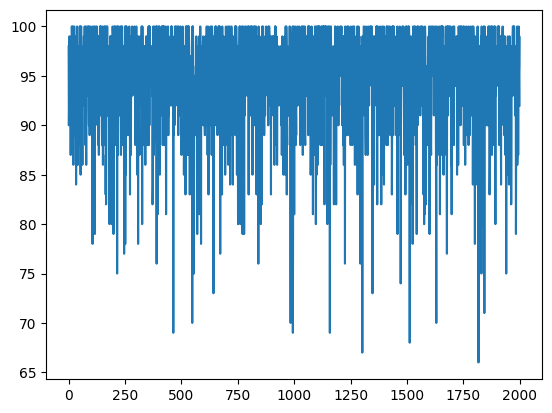

In [11]:
plt.plot(scores_easy)
plt.show()

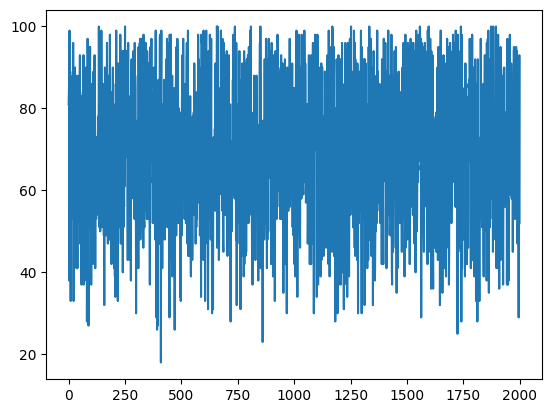

In [12]:
plt.plot(scores_hard)
plt.show()